In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('winequality-white.csv', sep = ';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see that we do not have any null values in the dataset. So we are good to go! However let's look at the correlation between the features and the response variable. 

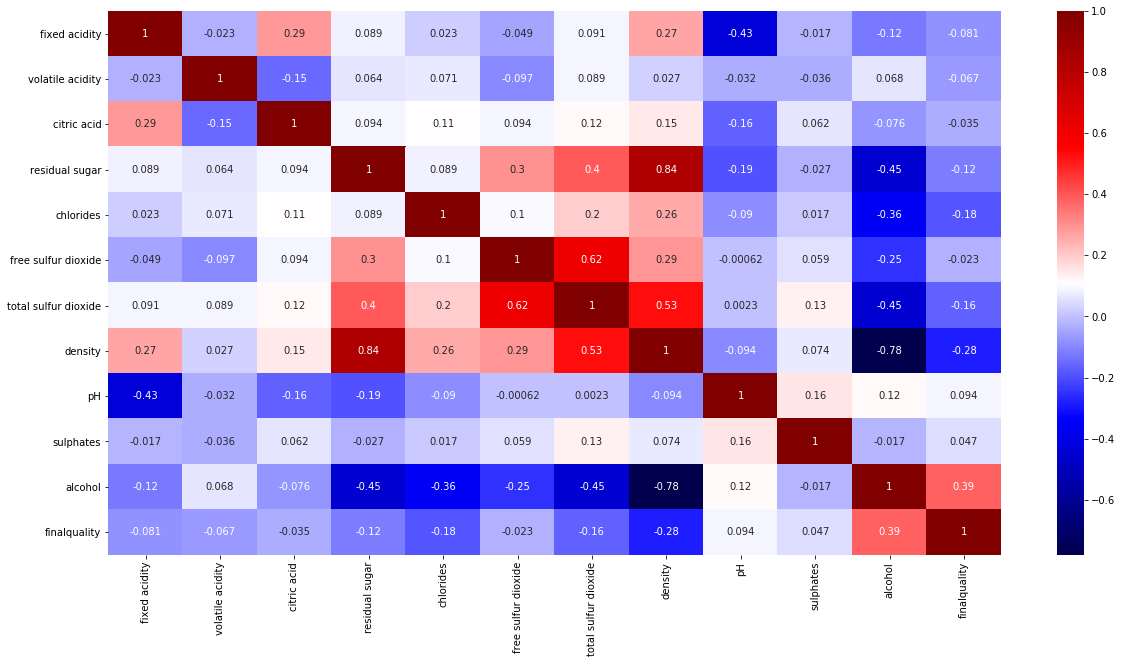

In [24]:
corr = data.drop('quality',axis = 1).corr()
plt.subplots(figsize = (20,10))
ax = sns.heatmap(corr, cmap = 'seismic', annot = True)
ax

We can see that there are few features that are directly affecting the quality.

Text(0, 0.5, 'Percentage')

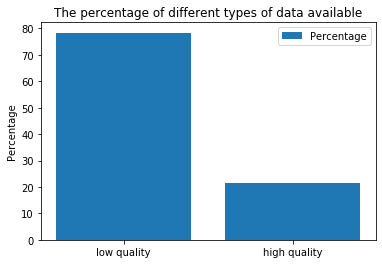

In [6]:
#converting into a classification problem. 
data['finalquality'] = [1 if x >= 7 else 0 for x in data['quality'] ]
lq = len(data[data['finalquality']==0])
hq = len(data[data['finalquality']==1])
plt.bar(['low quality','high quality'],[lq*100/(lq+hq),hq*100/(lq+hq)], label = 'Percentage')
plt.title('The percentage of different types of data available')
plt.legend()
plt.ylabel('Percentage')


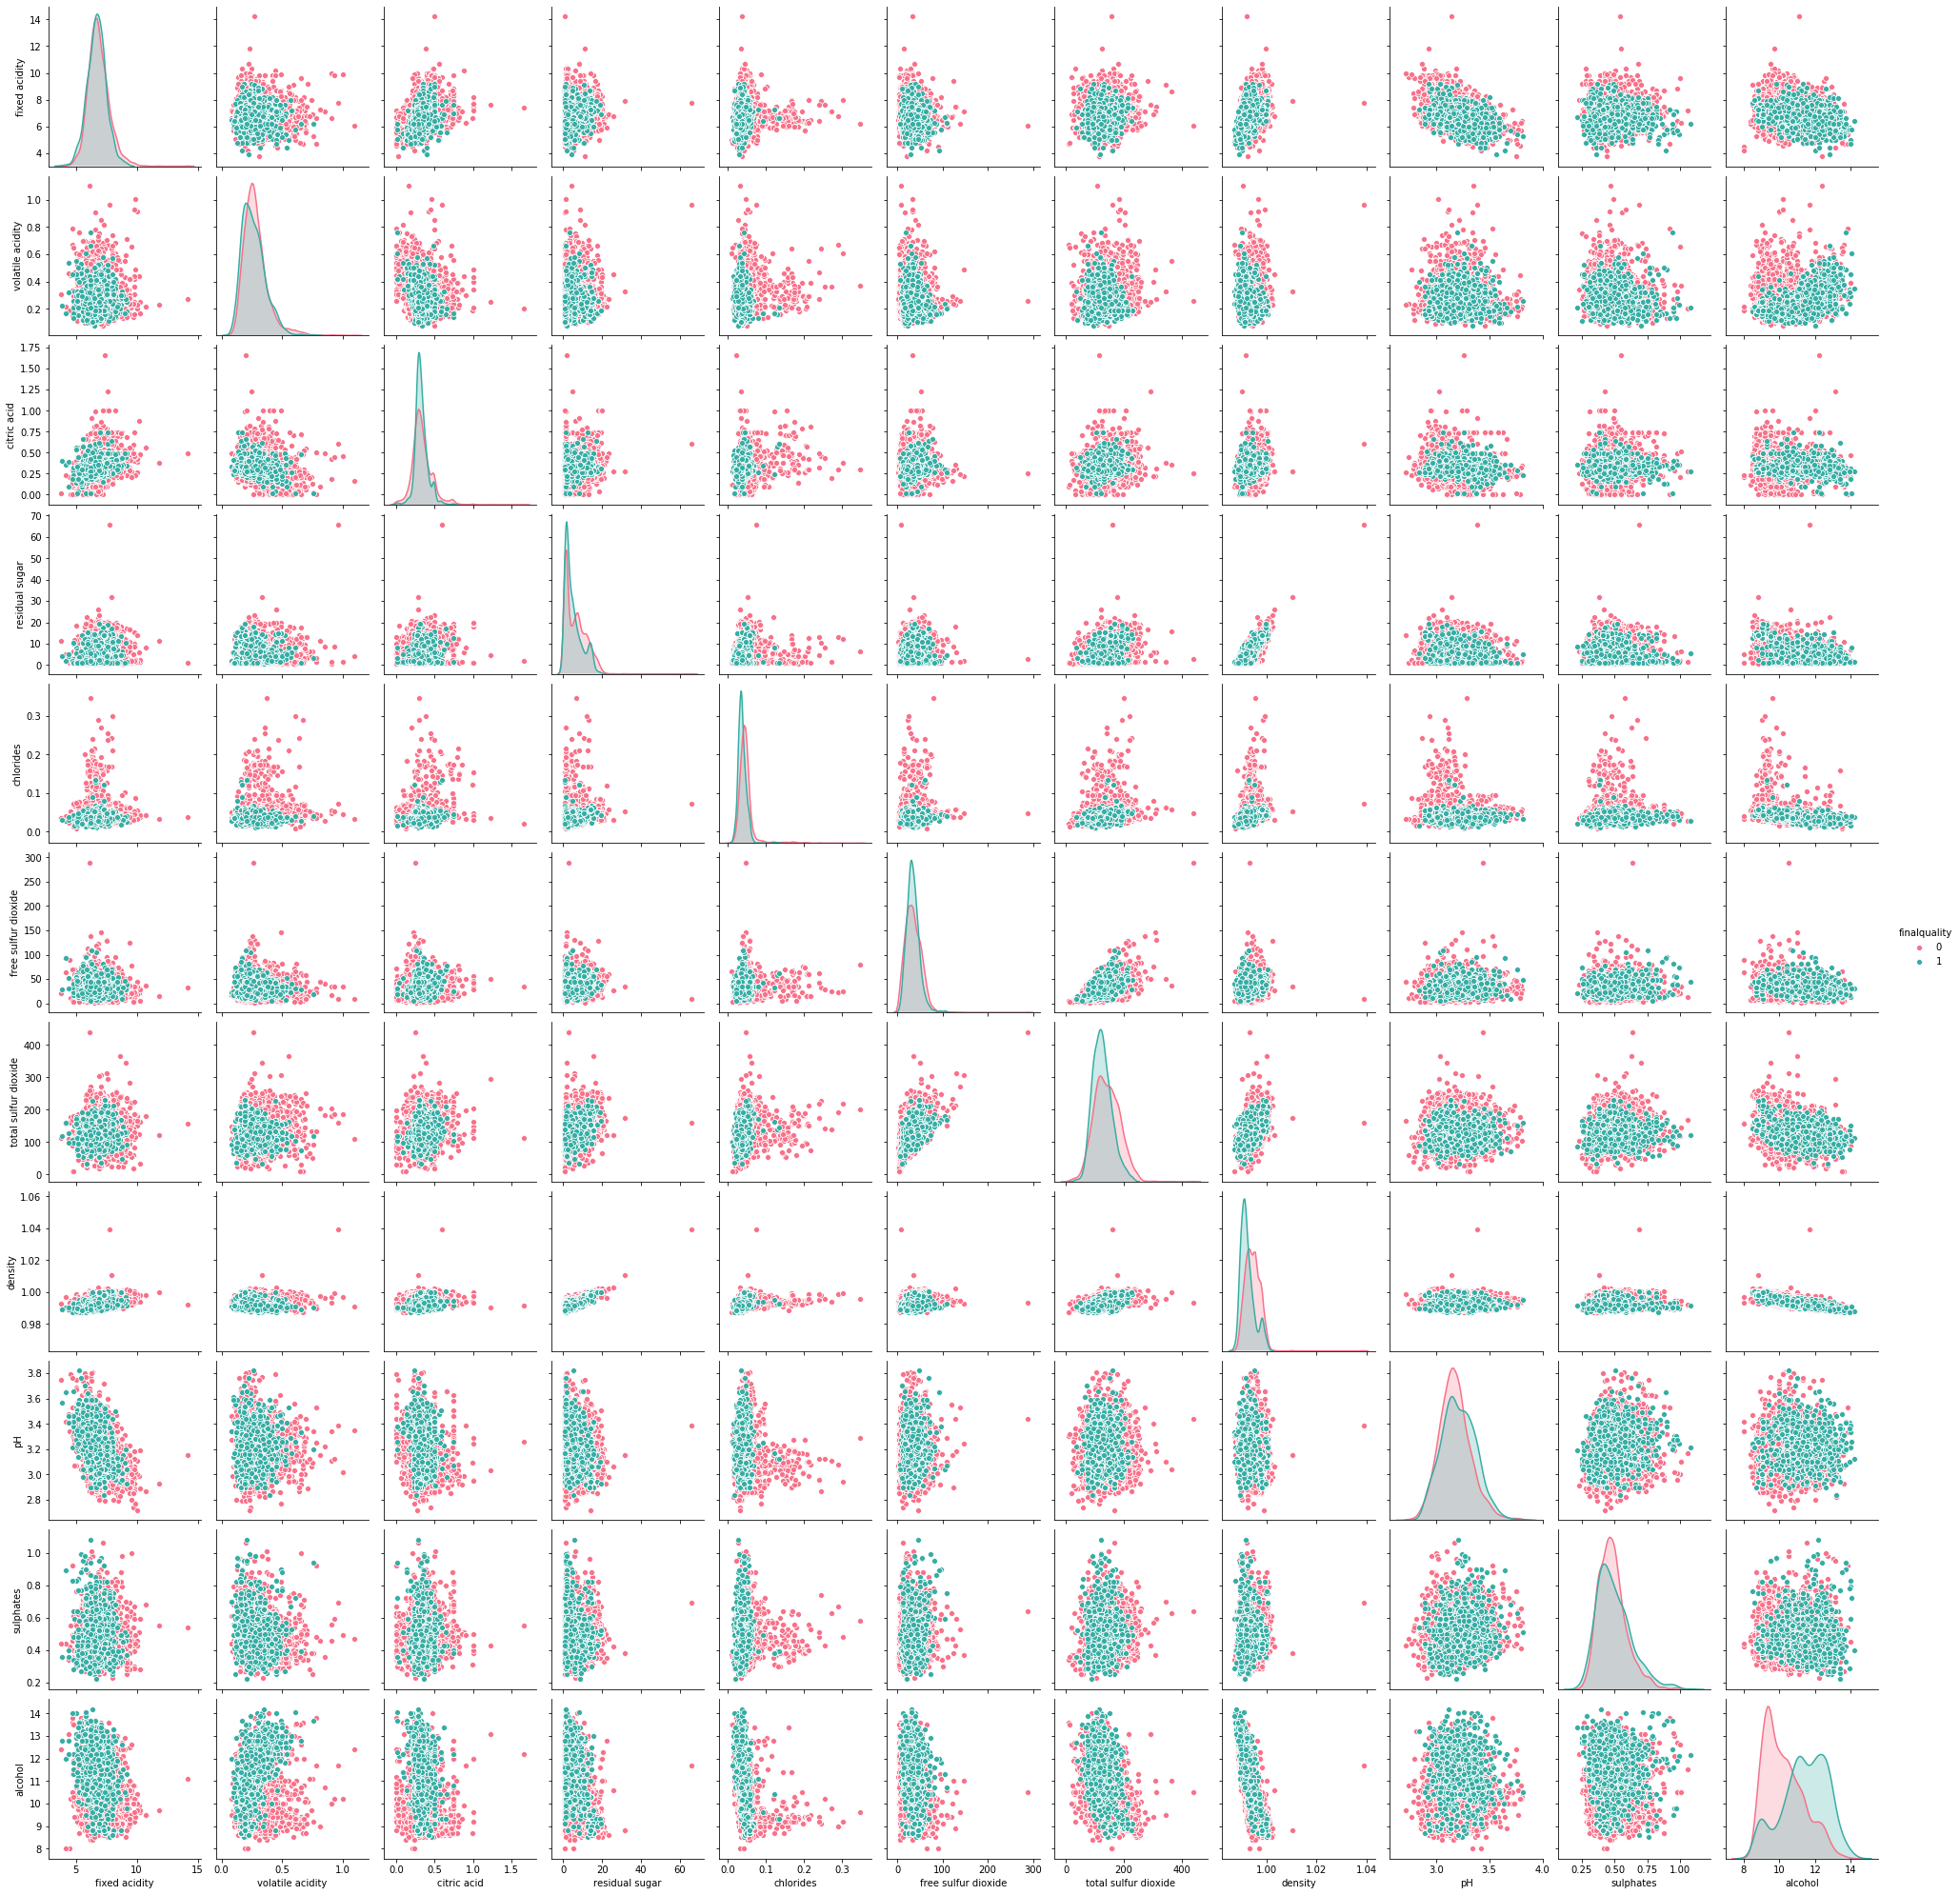

In [7]:
sns.pairplot(data.drop(['quality'], axis = 1), hue = 'finalquality', palette="husl")

In [8]:
X = data.drop(['quality','finalquality'], axis = 1)
Y = data['finalquality']

In [9]:
SS = StandardScaler()
S = SS.fit_transform(X)
poly = PolynomialFeatures(2)
P = poly.fit_transform(S)
X = pd.DataFrame(P)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y,test_size = 0.3, random_state = 101)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
print('The confusion matrix for logistic regression is\n', confusion_matrix(ytest, lr.predict(xtest)) ,'\n The classification report for  is\n', classification_report(ytest,lr.predict(xtest)))

The confusion matrix for logistic regression is
 [[1081   83]
 [ 187  119]] 
 The classification report for  is
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      1164
           1       0.59      0.39      0.47       306

    accuracy                           0.82      1470
   macro avg       0.72      0.66      0.68      1470
weighted avg       0.80      0.82      0.80      1470



/Users/vardhanselvarajan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
lr.score(xtest,ytest)

0.8163265306122449

In [14]:
from sklearn.tree import DecisionTreeClassifier
m1 = DecisionTreeClassifier(random_state = 1)
m1.fit(xtrain,ytrain)
yp1 = m1.predict(xtest)
print('The confusion matrix for Decision Tree Classifier is\n', confusion_matrix(ytest, yp1))
print('The classification report for Decision Tree Classifier is\n', classification_report(ytest,yp1))

The confusion matrix for Decision Tree Classifier is
 [[1002  162]
 [ 103  203]]
The classification report for Decision Tree Classifier is
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1164
           1       0.56      0.66      0.61       306

    accuracy                           0.82      1470
   macro avg       0.73      0.76      0.74      1470
weighted avg       0.83      0.82      0.83      1470



In [17]:
m1.score(xtest, ytest)

0.8197278911564626

In [18]:
from sklearn.ensemble import RandomForestClassifier
m2 = RandomForestClassifier(n_estimators = 100)
m2.fit(xtrain,ytrain)
yp2 = m2.predict(xtest)
print('The confusion matrix for Random Forest Classifier is\n', confusion_matrix(ytest, yp2))
print('The classification report for Random Forest Classifier is\n', classification_report(ytest,yp2))

The confusion matrix for Random Forest Classifier is
 [[1123   41]
 [ 136  170]]
The classification report for Random Forest Classifier is
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1164
           1       0.81      0.56      0.66       306

    accuracy                           0.88      1470
   macro avg       0.85      0.76      0.79      1470
weighted avg       0.87      0.88      0.87      1470



In [19]:
m2.score(xtest, ytest)

0.8795918367346939